In [1]:
import pickle
import pandas as pd

pd.options.display.max_colwidth = 400

product_asin='B018Y229OU'

# 10	B00L9EPT8O,B01E6AO69U	4
# 9	B00IOYAM4I	4
# 8	B00IOY8XWQ	4

# B018Y229OU
# B00L9EPT8O,B01E6AO69U
# B00U3FPN4U



with open('Reviews_DataFrame.pkl', 'rb') as f:
    data = pickle.load(f)

product_specific_data = data[data['product']==product_asin]
# data = data.groupby(['product','year'])['review'].count().reset_index().rename(columns={'review': 'count'}).sort_values(['product','year'], ascending=False)
product_specific_data
# data.groupby(['product'])['review'].count().reset_index().rename(columns={'review': 'count'}).sort_values(['product'], ascending=False)

,product,year,review
3695,B018Y229OU,2016,"Good basic tablet for checking email , web browsing , and reading ebooks."
3696,B018Y229OU,2016,I love this tablet. It was a great buy. I would strongly recommend buying it. It's a great reader but also good for surfing the web.
3697,B018Y229OU,2016,"Brought my old tablet in to my local store, and when they said that I would need to replace iit, they suggested this tablet. I love this tablet as much as my firsdt one! Easy to set up and use, plus the price was reasonable. :)"
3698,B018Y229OU,2016,Good Inexpensive tablet for someone that does not use it that often.
3699,B018Y229OU,2016,I got this for my niece. I would say this product is sturdy enough for kids 6 and older. She is able to play games and watch videos on it. She does occasionally read with it too. Overall a great product and won't break your bank.
...,...,...,...
14656,B018Y229OU,2017,I bought this tablet for my grandson in 4th grade. He loves it.
14657,B018Y229OU,2017,I have bought 3 of these tablets for my great grand children. excellent for learning and u don't use data.
14658,B018Y229OU,2017,Bought this for my four year old niece and she loves it.
14659,B018Y229OU,2017,Its exactly what I am wanted and the price was fair


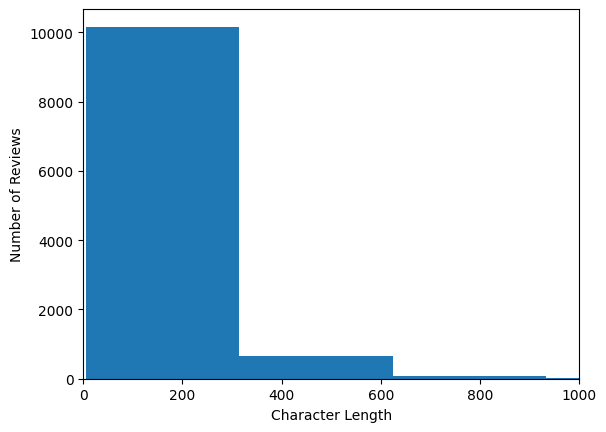

In [18]:
import matplotlib.pyplot as plt

original_reviews_lens=[len(text) for text in product_specific_data.review]
plt.hist(original_reviews_lens)
plt.xlabel("Character Length")
plt.ylabel("Number of Reviews")
plt.xlim([0, 1000]) 
plt.show()

In [3]:
import spacy

# Load the Spacy model
nlp = spacy.load('en_core_web_sm')

In [4]:
from semanticchunking import SemanticChunking

reviews_chunking = SemanticChunking(product_asin,product_specific_data,nlp)
chunked_reviews = reviews_chunking.get_reviews_chunks()

  0%|                                                                                                         | 9/10966 [00:00<02:03, 88.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 10966/10966 [01:41<00:00, 108.12it/s]


In [5]:
chunked_reviews

,product,year,review
0,B018Y229OU,2016,"Good basic tablet for checking email , web browsing , and reading ebooks."
1,B018Y229OU,2016,I love this tablet.
2,B018Y229OU,2016,It was a great buy.
3,B018Y229OU,2016,I would strongly recommend buying it.
4,B018Y229OU,2016,It's a great reader but also good for surfing the web.
...,...,...,...
27594,B018Y229OU,2017,excellent for learning and u don't use data.
27595,B018Y229OU,2017,Bought this for my four year old niece and she loves it.
27596,B018Y229OU,2017,Its exactly what I am wanted and the price was fair
27597,B018Y229OU,2017,Awesome tablet it's fast and easy to use.


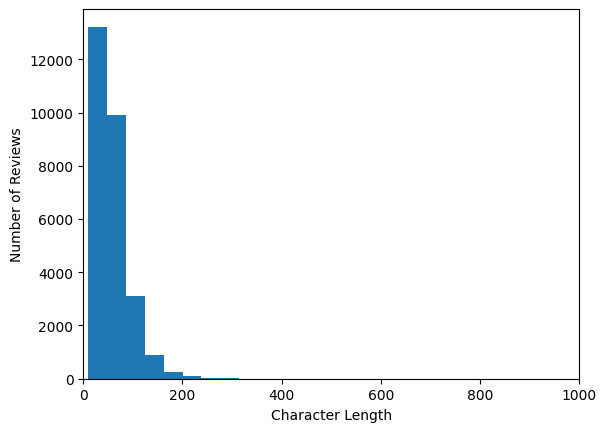

In [19]:
chunked_reviews_lens=[len(text) for text in chunked_reviews.review]
plt.hist(chunked_reviews_lens)
plt.xlabel("Character Length")
plt.ylabel("Number of Reviews")
plt.xlim([0, 1000]) 
plt.show()

In [7]:
from sentimentanalysis import SentimentAnalysis

predef_model = "cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_predef = SentimentAnalysis("predefined")
predef_sentiment_labels = sentiment_predef.get_sentiments_from_predefined_model(predef_model,list(chunked_reviews.review),batch_size=32)

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


2024-04-01 16:55:37.982495: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-01 16:55:42.500284: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoi

In [11]:
zc_model = "facebook/bart-large-mnli"
sentiment_zc = SentimentAnalysis("zero-classification")
zc_sentiment_labels = sentiment_zc.get_sentiments_from_zero_classification(zc_model,list(chunked_reviews.review))

In [12]:
print(len(chunked_reviews.review))
print(len(predef_sentiment_labels))
print(len(zc_sentiment_labels))

27599
27599
27599


In [13]:
sentichunk_reviews = chunked_reviews.assign(predef_sentiment = predef_sentiment_labels)
sentichunk_reviews = sentichunk_reviews.assign(zc_sentiment = zc_sentiment_labels)


In [34]:
pos_sen = sentichunk_reviews[['review','zc_sentiment']][sentichunk_reviews['zc_sentiment']=='positive'].rename(columns={'zc_sentiment':'sentiment'}).head(5)
neg_sen = sentichunk_reviews[['review','zc_sentiment']][sentichunk_reviews['zc_sentiment']=='negative'].rename(columns={'zc_sentiment':'sentiment'}).head(5)
neu_sen = sentichunk_reviews[['review','zc_sentiment']][sentichunk_reviews['zc_sentiment']=='neutral'].rename(columns={'zc_sentiment':'sentiment'}).head(5)
pd.concat([pos_sen,neg_sen,neu_sen])

,review,sentiment
0,"Good basic tablet for checking email , web browsing , and reading ebooks.",positive
1,I love this tablet.,positive
2,It was a great buy.,positive
3,I would strongly recommend buying it.,positive
4,It's a great reader but also good for surfing the web.,positive
21,It's great with applications but it's limited when it comes to kids video outside of Amazon's store.,negative
54,They haven't put them dwn willingly yet!,negative
77,still learning how to navigate.,negative
82,This is my first tablet.,negative
111,Slow to use because there are constant popups.,negative


In [35]:
pos_sen = sentichunk_reviews[['review','predef_sentiment']][sentichunk_reviews['predef_sentiment']=='positive'].rename(columns={'predef_sentiment':'sentiment'}).head(5)
neg_sen = sentichunk_reviews[['review','predef_sentiment']][sentichunk_reviews['predef_sentiment']=='negative'].rename(columns={'predef_sentiment':'sentiment'}).head(5)
neu_sen = sentichunk_reviews[['review','predef_sentiment']][sentichunk_reviews['predef_sentiment']=='neutral'].rename(columns={'predef_sentiment':'sentiment'}).head(5)
pd.concat([pos_sen,neg_sen,neu_sen])

,review,sentiment
0,"Good basic tablet for checking email , web browsing , and reading ebooks.",positive
1,I love this tablet.,positive
2,It was a great buy.,positive
3,I would strongly recommend buying it.,positive
4,It's a great reader but also good for surfing the web.,positive
54,They haven't put them dwn willingly yet!,negative
111,Slow to use because there are constant popups.,negative
112,Barely dropped it 2 feet to the ground and now it doesn't work.,negative
113,Highly unsatisfied.,negative
119,Very slow if you want to stream videos though.,negative


In [15]:
with open(f'Reviews_{product_asin}.pkl', 'wb') as f:
    pickle.dump(sentichunk_reviews, f)
